# Flop Counting & Performance Plot for Basic Implementation
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --------------------------------------
# HARDWARE INFORMATION
# => Add your hardware information here
# --------------------------------------
hardware_info = "Intel(R) Core(TM) i9-8950HK CPU @ 2.90GHz \n" \
                "Cache Sizes - L1: 32KB, L2: 256KB, L3: 12MB \n" \
                "Compiler: Apple clang version 11.0.0 \n" \
                "OS: MacOS Catalina, 10.15.4";
hardware_info_feli = "Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz"

In [3]:
# --------------------------------------
# FLOP COUNTING - Helper Functions
# --------------------------------------

def sure(n):
    adds = 12*n**2;
    mults = 12*n**2
    divs = 0
    return np.array([adds, mults, divs])

def flt_channel_basic(f, r, n):
    adds = (n-2*(r+f))**2 * (2*r+1)**2 * (18*(2*f+1)**2 + 4) + (n-2*(r+f))**2
    mults = (n-2*(r+f))**2 * (2*r+1)**2 * (9*(2*f+1)**2 + 5) 
    divs = (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2+1) + (n-2*(r+f))**2 
    return np.array([adds, mults, divs])


def flt_buffer_basic(f, r, n):
    adds = (n-2*(r+f))**2 * (2*r+1)**2 * (18*(2*f+1)**2 + 6) + 3*(n-2*(r+f))**2
    mults = (n-2*(r+f))**2 * (2*r+1)**2 * (9*(2*f+1)**2 + 7) 
    divs = (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2+1) + 3*(n-2*(r+f))**2
    return np.array([adds, mults, divs])

def flt(f,r,n):
    adds = (n-2*(r+f))**2 * (2*r+1)**2 * (18*(2*f+1)**2 + 15) + 8*(n-2*(r+f))**2 
    mults = (n-2*(r+f))**2 * (2*r+1)**2 * (9*(2*f+1)**2 + 16) + 12*(n-2*(r+f))**2
    divs = (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2+4) + 3*(n-2*(r+f))**2 
    return np.array([adds, mults, divs])

def filter_averaging(n):
    adds = 12*n**2
    mults = 9*n**2
    divs = 9*n**2
    return np.array([adds, mults, divs])


# --------------------------------------
# BASIC IMPLEMENTATION - FLOP COUNT
# --------------------------------------

def basic(n, R):

    # Compute op-count for one run of the basic implementation
    total = 2*flt_buffer_basic(3, 5, n)
    total += flt(1, R, n)
    total += flt(3, R, n)
    total += flt(1, R, n)
    total += (3*sure(n))
    total += (3*flt_channel_basic(1,1,1))
    # total += binary_selection(n)
    total += flt_channel_basic(1, 5, n)
    total += filter_averaging(n)
    
    return total

<hr>

### (A) Performance Plot with R=10 (fixed window size)

In [4]:
# ------------------------------------------------------
# MEASURED CYCLES 
# => copy output arrays of performance evaluation script
# ------------------------------------------------------

n = np.array([32, 64, 80, 96, 112, 128, 256, 512])

flags = ["-O0", 
         "-03 -fno-tree-vectorize", 
         "-03 -ffast-math -march=native"]

cycles = np.array([[8.09516e+08, 1.14798e+10, 2.07577e+10, 3.45336e+10, 4.98050e+10, 7.37735e+10, 3.45199e+11, 1.49453e+12],
                   [1.769e+08, 2.38142e+09, 4.50356e+09, 7.28734e+09, 1.07199e+10, 1.612e+10, 8.04228e+10, 3.48705e+11],
                   [1.78076e+08, 2.38001e+09, 4.49588e+09, 7.26405e+09, 1.07094e+10, 1.5718e+10, 7.81106e+10, 3.40981e+11]
                  ])

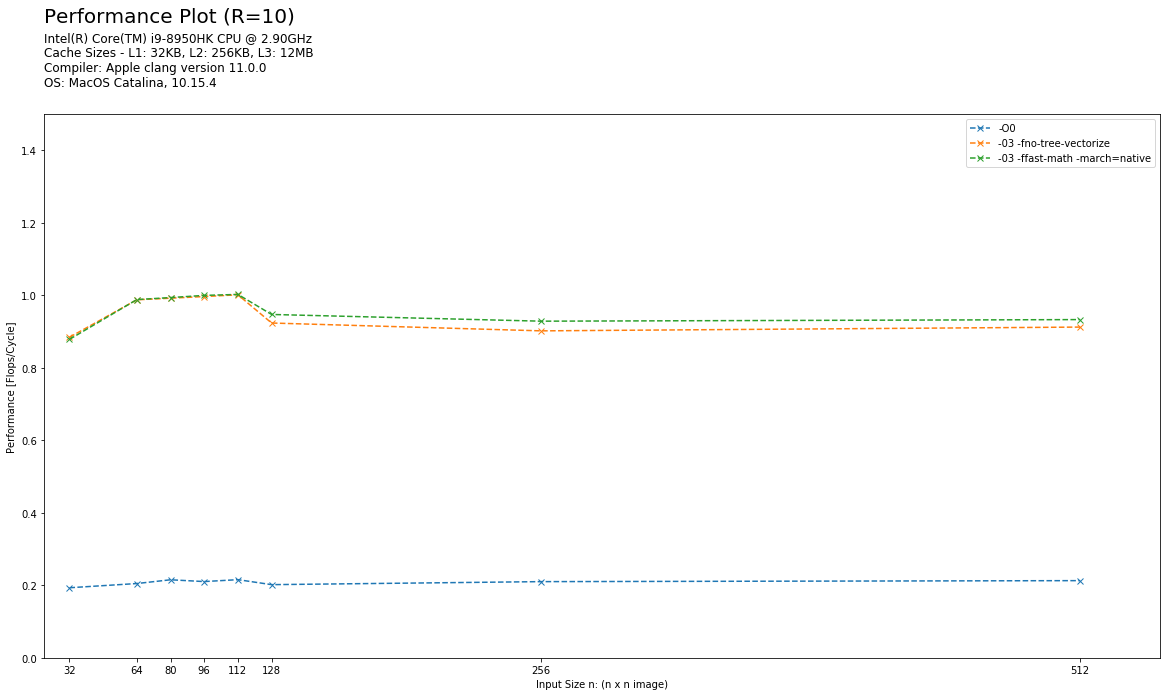

In [5]:
# ------------------------------------------------------
# PERFORMANCE PLOT
# => Basic Implementation with different compiler flags
# ------------------------------------------------------

R = 10
performance = np.zeros((len(flags), len(n)))

# Init Figure
fig = plt.figure(figsize=(20,10))

# Compute Performance for all series (different compiler flags)
for i, flag in enumerate(flags):
    
    # Compute Performance for all resolutions
    for j in range(n.shape[0]):
        flop_count = basic(n[j],R).sum()
        performance[i][j] = flop_count / cycles[i][j]
        
    # Add serie to plot
    plt.plot(n, performance[i], 'x--', label=flag)


# Customize Plot 
plt.xticks(n)
plt.ylim(0,1.5)
plt.xlim(20,550)
plt.ylabel("Performance [Flops/Cycle]")
plt.xlabel("Input Size n: (n x n image)")

suptitle = plt.suptitle("Performance Plot (R=10)", x=0.125, y=1.03, fontsize=20, ha='left')
plt.title(hardware_info, fontsize=12, x=0, y=1.04, ha='left') 

plt.legend()
fig.savefig('performance_plot',bbox_inches='tight',bbox_extra_artists=[suptitle]) 

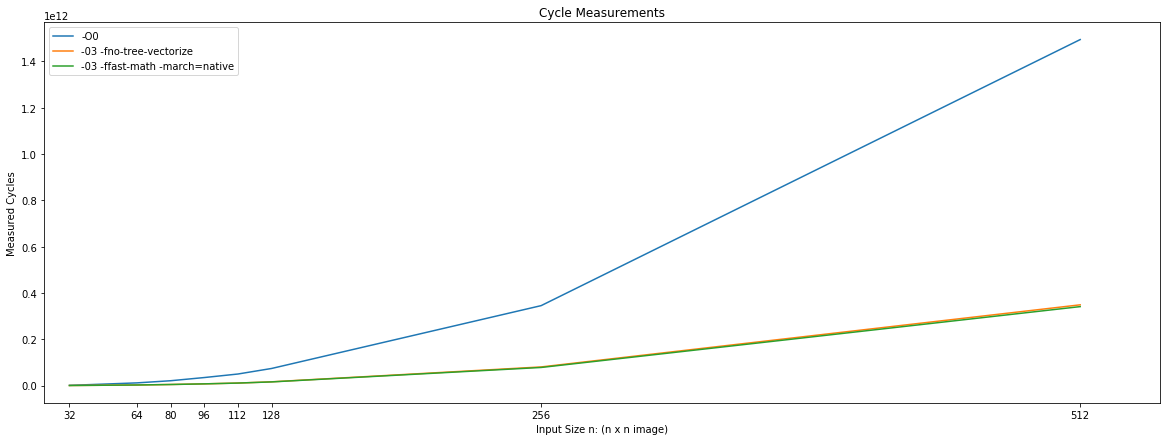

In [6]:
# ------------------------------------------------------
# PLOT OF MEASURED CYCLES
# ------------------------------------------------------

fig = plt.figure(figsize=(20,7))
for i, flag in enumerate(flags):
    plt.plot(n, cycles[i], label=flag)
plt.xticks(n)
plt.xlim(20,550)
plt.ylabel("Measured Cycles")
plt.xlabel("Input Size n: (n x n image)")
plt.title("Cycle Measurements")
plt.legend()
plt.show()

<hr>

### (B) Performance Measurements with varying window size R

In [7]:
# MEASUREMENTS (for varying R)

R = np.array([3,5,7,9,11,13,15])

n = [64, 
     80, 
     96, 
     112, 
     128]

cycles = np.array([[1.282e+09, 1.60123e+09, 1.94838e+09, 2.25011e+09, 2.49989e+09, 2.64636e+09, 2.6829e+09],
                  [2.21814e+09, 2.79883e+09, 3.4835e+09, 4.18385e+09, 4.81357e+09, 5.38053e+09, 5.81773e+09],
                  [3.43335e+09, 4.34709e+09, 5.46841e+09, 6.66852e+09, 7.94467e+09, 9.08941e+09, 1.01068e+10],
                  [4.87851e+09, 6.19354e+09, 7.85784e+09, 9.72644e+09, 1.16974e+10, 1.43464e+10, 1.56145e+10],
                  [6.83204e+09, 9.17422e+09, 1.18027e+10, 1.45348e+10, 1.76738e+10, 2.09749e+10, 2.48696e+10]  
                ])
         

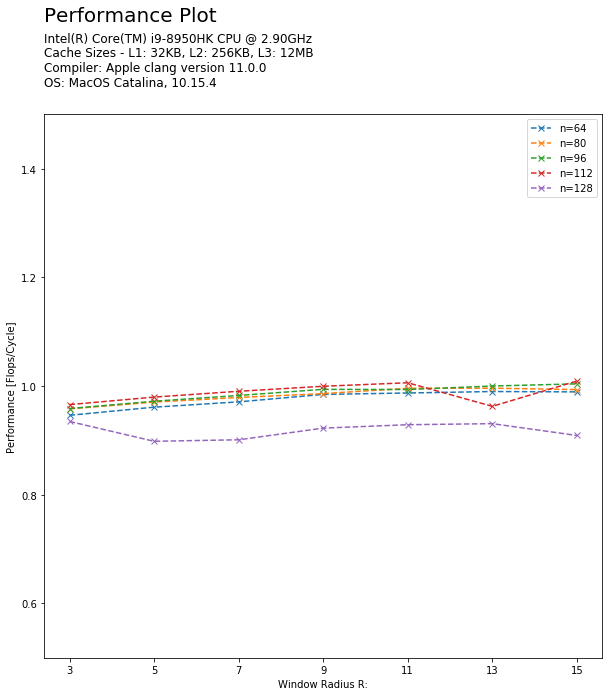

In [8]:
# ------------------------------------------------------
# PERFORMANCE PLOT
# => Basic Implementation with varying window size R
# ------------------------------------------------------

performance = np.zeros((len(n), len(R)))

# Init Figure
fig = plt.figure(figsize=(10,10))

for i, img_size in enumerate(n):
    
    # Compute performance for all windows sizes r 
    for r, win_size in enumerate(R):
        flop_count = basic(img_size, win_size).sum()
        performance[i][r] = flop_count / cycles[i][r]
   
    plt.plot(R, performance[i], 'x--', label="n="+str(img_size))
             
# Customize Plot
plt.xticks(R)
plt.ylim(0.5,1.5)
plt.ylabel("Performance [Flops/Cycle]")
plt.xlabel("Window Radius R:")

suptitle = plt.suptitle("Performance Plot", x=0.125, y=1.03, fontsize=20, ha='left')
plt.title(hardware_info, fontsize=12, x=0, y=1.04, ha='left') 

plt.legend()
fig.savefig('performance_plot_varyingR',bbox_inches='tight',bbox_extra_artists=[suptitle]) 


## Plots including optimizations

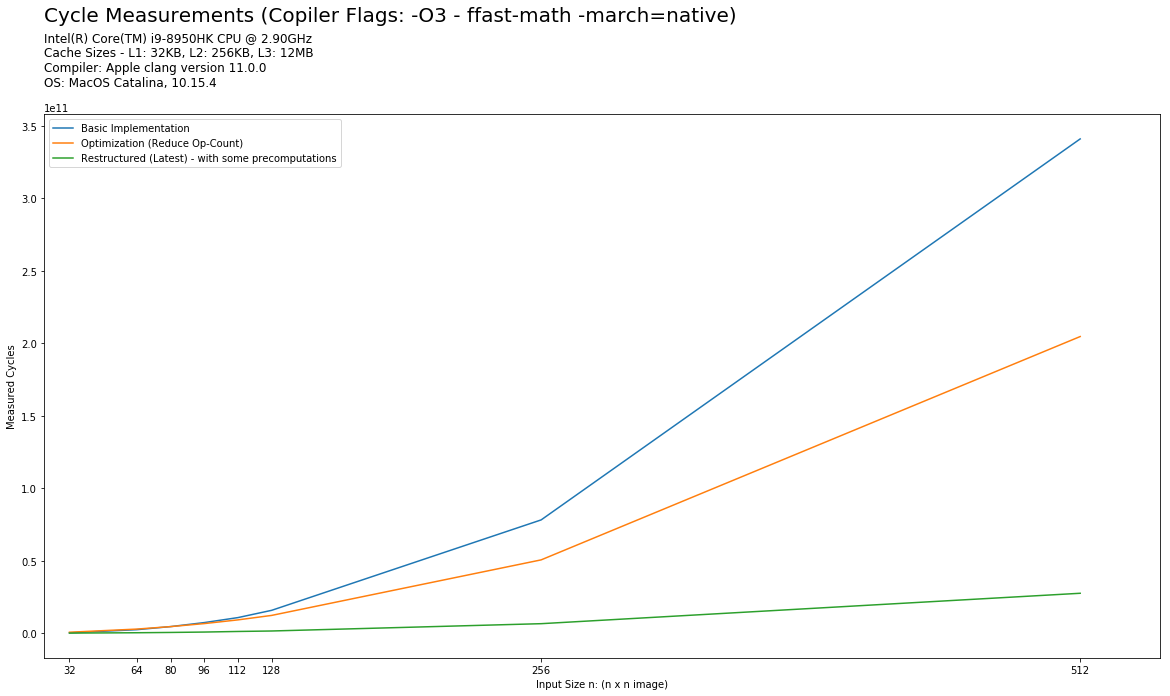

In [15]:
series = ["Basic Implementation", 
          "Optimization (Reduce Op-Count)",
          "Restructured (Latest) - with some precomputations"]


n = np.array([32, 64, 80, 96, 112, 128, 256, 512])

cycles = np.array([[1.78076e+08, 2.38001e+09, 4.49588e+09, 7.26405e+09, 1.07094e+10, 1.5718e+10, 7.81106e+10, 3.40981e+11],
                   [6.19067e+08, 2.78789e+09, 4.48639e+09, 6.57584e+09, 9.13254e+09, 1.22144e+10, 5.0534e+10, 2.04622e+11],
                   [2.00836e+07, 2.60186e+08, 4.64624e+08, 7.34258e+08, 1.14163e+09, 1.46515e+09, 6.512e+09, 2.74975e+10]
                  ])

# ------------------------------------------------------
# PLOT OF MEASURED CYCLES
# ------------------------------------------------------

fig = plt.figure(figsize=(20,10))
for i, serie in enumerate(series):
    plt.plot(n, cycles[i], label=serie)
plt.xticks(n)
plt.xlim(20,550)
plt.ylabel("Measured Cycles")
plt.xlabel("Input Size n: (n x n image)")
suptitle = plt.suptitle("Cycle Measurements (Copiler Flags: -O3 - ffast-math -march=native)", x=0.125, y=1.03, fontsize=20, ha='left')
plt.title(hardware_info, fontsize=12, x=0, y=1.04, ha='left') 
plt.legend()
fig.savefig('cycle_comparison',bbox_inches='tight',bbox_extra_artists=[suptitle])

In [16]:
# Calculate speedup for different n's
for i, n in enumerate(n):
    print("Speedup n=" +  str(n) + ": \t" + str(cycles[0][i] / cycles[-1][i]))

Speedup n=32: 	8.866737039176243
Speedup n=64: 	9.147340748541428
Speedup n=80: 	9.676383484279762
Speedup n=96: 	9.89304849249174
Speedup n=112: 	9.380797631456776
Speedup n=128: 	10.727911817902603
Speedup n=256: 	11.994871007371007
Speedup n=512: 	12.400436403309392


##### (B) Cycle Measurements with varying window size R

In [17]:
# MEASUREMENTS (for varying R)

R = np.array([3,5,7,9,11,13,15])

n = [64,
     80, 
     96, 
     112, 
     128,
     256]

cycles = np.array([[1.19432e+08, 1.71551e+08, 2.31284e+08, 2.8701e+08, 3.35155e+08, 3.56957e+08, 3.72775e+08],
                   [1.88983e+08, 2.81604e+08, 3.9492e+08, 5.08195e+08, 6.13744e+08, 7.00979e+08, 7.60418e+08],
                   [2.79976e+08, 4.25507e+08, 6.14056e+08, 7.96298e+08, 9.75003e+08, 1.15476e+09, 1.29262e+09],
                   [3.84066e+08, 5.92169e+08, 8.60357e+08, 1.15325e+09, 1.45829e+09, 1.71328e+09, 2.02655e+09],
                   [5.15227e+08, 7.87621e+08, 1.17582e+09, 1.5814e+09, 2.0291e+09, 2.51939e+09, 2.89098e+09],
                   [2.11053e+09, 3.17545e+09, 4.80503e+09, 6.80927e+09, 9.15779e+09, 1.2048e+10, 1.50639e+10]
                ])
         

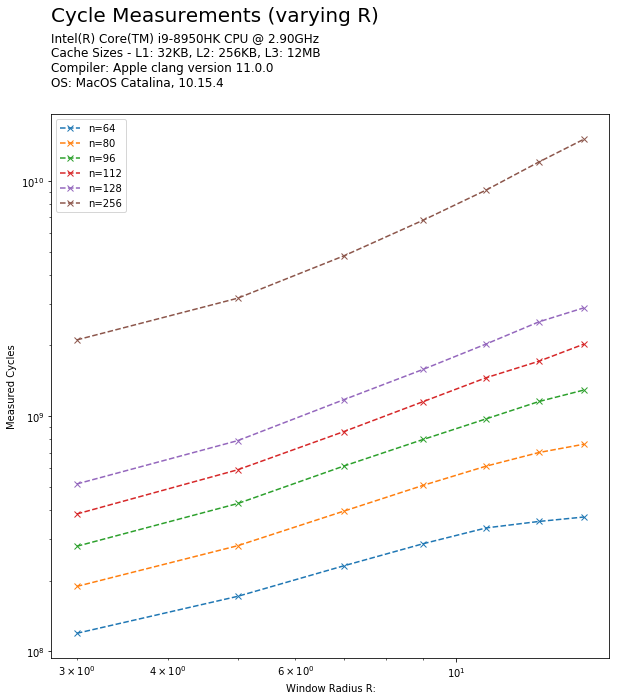

In [18]:
# ------------------------------------------------------
# PERFORMANCE PLOT
# => Basic Implementation with varying window size R
# ------------------------------------------------------

performance = np.zeros((len(n), len(R)))

# Init Figure
fig = plt.figure(figsize=(10,10))

for i, img_size in enumerate(n):
    plt.loglog(R, cycles[i], 'x--', label="n="+str(img_size))
             
# Customize Plot
plt.ylabel("Measured Cycles")
plt.xlabel("Window Radius R:")

suptitle = plt.suptitle("Cycle Measurements (varying R)", x=0.125, y=1.03, fontsize=20, ha='left')
plt.title(hardware_info, fontsize=12, x=0, y=1.04, ha='left') 

plt.legend()
fig.savefig('performance_plot_varyingR',bbox_inches='tight',bbox_extra_artists=[suptitle]) 



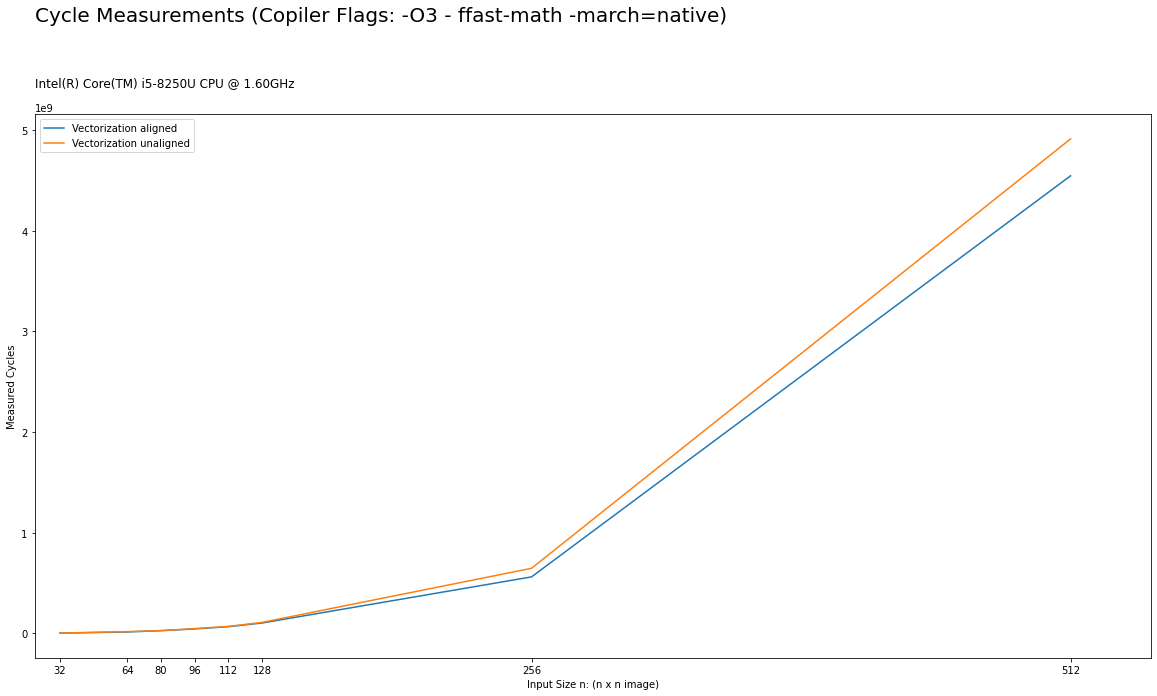

In [5]:
series = ["Vectorization aligned", 
          "Vectorization unaligned"]


n = np.array([32, 64, 80, 96, 112, 128, 256, 512])

cycles = np.array([[514612, 1.17607e+07, 2.44233e+07, 4.19678e+07,  6.42262e+07,  1.007e+08, 5.58944e+08,4.54525e+09],
                   [608805, 1.50115e+07, 2.51881e+07,  4.49991e+07, 6.68024e+07,  1.06823e+08, 6.44165e+08,  4.91194e+09]
                  ])

# ------------------------------------------------------
# PLOT OF MEASURED CYCLES
# ------------------------------------------------------

fig = plt.figure(figsize=(20,10))
for i, serie in enumerate(series):
    plt.plot(n, cycles[i], label=serie)
plt.xticks(n)
plt.xlim(20,550)
plt.ylabel("Measured Cycles")
plt.xlabel("Input Size n: (n x n image)")
suptitle = plt.suptitle("Cycle Measurements (Copiler Flags: -O3 - ffast-math -march=native)", x=0.125, y=1.03, fontsize=20, ha='left')
plt.title(hardware_info_feli, fontsize=12, x=0, y=1.04, ha='left') 
plt.legend()
fig.savefig('cycle_comparison_vec_align',bbox_inches='tight',bbox_extra_artists=[suptitle])

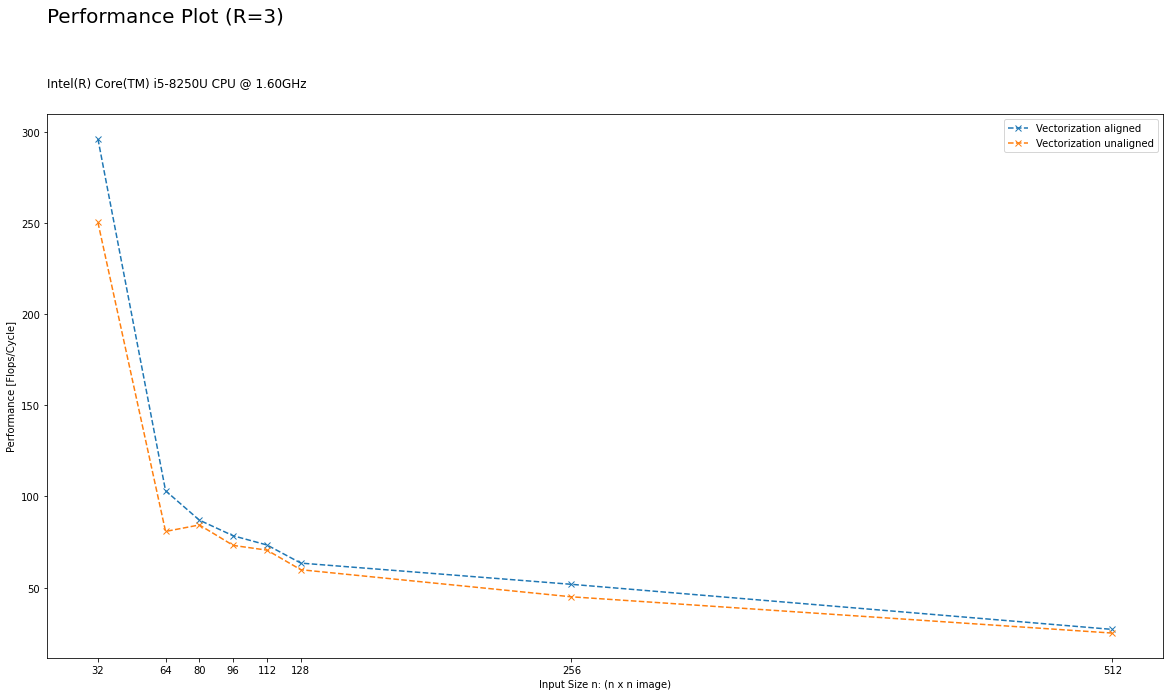

In [6]:
R = 3
performance = np.zeros((len(series), len(n)))

# Init Figure
fig = plt.figure(figsize=(20,10))

# Compute Performance for all series (different compiler flags)
for i, flag in enumerate(series):
    
    # Compute Performance for all resolutions
    for j in range(n.shape[0]):
        flop_count = basic(n[j],R).sum()
        performance[i][j] = flop_count / cycles[i][j]
        
    # Add serie to plot
    plt.plot(n, performance[i], 'x--', label=flag)

# Customize Plot 
plt.xticks(n)

plt.ylabel("Performance [Flops/Cycle]")
plt.xlabel("Input Size n: (n x n image)")

suptitle = plt.suptitle("Performance Plot (R=3)", x=0.125, y=1.03, fontsize=20, ha='left')
plt.title(hardware_info_feli, fontsize=12, x=0, y=1.04, ha='left') 

plt.legend()
fig.savefig('performance_plot_vec_align',bbox_inches='tight',bbox_extra_artists=[suptitle]) 